Load Packages

In [3]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from Meta_fun import *
%matplotlib inline


Load Data set

In [2]:
# %load Pipeline_clean.py
%load_ext autoreload
%autoreload 2
from data_merge import *
from Clean_Fun import *

# NOTE have to use remove_invalid_rows() inside ALex's function,
# before we remove patient name
# %% Load dataset

live_path='Data/Cardiac Program_M.xlsx'
archive_path='Data/Cardiac Program_Archive.xlsx'
live_sheet_pkl='pickle_jar/live_sheets.pkl'
archive_sheet_pkl='pickle_jar/archive_sheets.pkl'
datecol_pkl='pickle_jar/datecols.pkl'
df = sheet_merge(live_path, archive_path,
    live_sheet_pkl, archive_sheet_pkl, datecol_pkl)


KeyboardInterrupt: 

In [2]:
#df.to_csv("Data/after_merge.csv")

Apply the cleaning function to the data frame.

In [4]:
df = pd.read_csv("Data/after_merge.csv", index_col=0)

In [5]:
df=meta_clean(df)

EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
Couldn't extract EF so set to na_val
51 (30 -35)
Imputing 121.0,242.0 from other column
Imputing 90.0,180.0 from other column
Imputing 134,80 from Blood Pressure Column
Imputing 116,73 from Blood Pressure Column
Imputing 134,80 from Blood Pressure Column
Imputing 116,73 from Blood Pressure Column
num missing 383
value counts before zero and one assignment: 0                                                      383
lisinopril 5mg qd                                       41
none                                                    35
lisinopril 2.5mg qd                                     34
losartan 50mg qd                                        21
lisinopril 10mg qd                                      20
losartan 100mg qd

removing invalid row: 0

patient_link                             n0EPhlbX
enrollId                               n0EPhlbX_3
Enrollment_Date                               NaN
name                                 1 Tester, Mv
create_user        notifications@providerloop.com
Name: 0, dtype: object
--------------------------------------------------

 
 Dropped 1 rows from the dataset
New size of dataset: (763, 54)
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcom

/usr/lib/python3.7/site-packages/pandas/core/series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Columns to keep

In [20]:
column_dict=read_pkl('Models/model_columns.pkl')
keep_cols=column_dict['keep_cols']
pat_cols=column_dict['pat_cols']

In [13]:
print(keep_cols)

['patient_gender', 'ef', 'admit_weight', 'weight', 'this_weight_change_frac', 'weight_change_since_admit_frac', 'bnp', 'this_bnp_change', 'ace', 'bb', 'diuretics', 'anticoagulant', 'ionotropes', 'other_cardiac_meds', 'bun', 'cr', 'potasium', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic', 'outcome', 'cad/mi', 'heart_failure_unspecfied', 'diastolic_heart_failure', 'systolic_chf', 'atrial_fibrilation', 'cardiomyoapthy', 'lvad', 'chf', 'duration', 'age', 'F_5nKZ993n', 'F_71ADiKaS', 'F_Fy1r9IXM', 'F_KYzNhByH', 'F_L1V04aB0', 'F_US4llDDz', 'F_Xxk5Yn3E', 'F_kIUZIzRp', 'F_mB0G57bu']


In [18]:
column_dict["keep_cols"] = ['patient_gender', 'ef', 'weight', 'this_weight_change_frac', 'weight_change_since_admit_frac', 'bnp', 'this_bnp_change', 'ace', 'bb', 'diuretics', 'anticoagulant', 'ionotropes', 'other_cardiac_meds', 'bun', 'cr', 'potasium', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic', 'outcome', 'cad/mi', 'heart_failure_unspecfied', 'diastolic_heart_failure', 'systolic_chf', 'atrial_fibrilation', 'cardiomyoapthy', 'lvad', 'chf', 'duration', 'age', 'F_5nKZ993n', 'F_71ADiKaS', 'F_Fy1r9IXM', 'F_KYzNhByH', 'F_L1V04aB0', 'F_US4llDDz', 'F_Xxk5Yn3E', 'F_kIUZIzRp', 'F_mB0G57bu']

In [19]:
write_pkl(column_dict, 'Models/model_columns.pkl')

Object saved to path "Models/model_columns.pkl"


## impute missing values

In [21]:
final_imputation(df)

Successfully imputed for all missing values


there remains 20 annoying patients with many missing values

Only keep columns we're using.

In [22]:
df = df[keep_cols]

In [24]:
df.isna().sum()

patient_gender                      0
ef                                  0
weight                              0
this_weight_change_frac             0
weight_change_since_admit_frac      0
bnp                                 0
this_bnp_change                     0
ace                                 0
bb                                  0
diuretics                           0
anticoagulant                       0
ionotropes                          0
other_cardiac_meds                  0
bun                                 0
cr                                  0
potasium                            0
this_cr_change                      0
resting_hr                          0
systolic                            0
diastolic                           0
outcome                           303
cad/mi                              0
heart_failure_unspecfied            0
diastolic_heart_failure             0
systolic_chf                        0
atrial_fibrilation                  0
cardiomyoapt

In [25]:
train(df).isnull().sum()
df.dropna(inplace=True)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
df.shape

(457, 40)

Remove patients with unknown outcome

In [27]:
df = df[df.outcome < 2]

In [28]:
df.shape

(439, 40)

### Log transforms

In [30]:
df = df.apply(get_log_transformed_columns)

### Normalize data

In [31]:
df = get_standardized_columns(df)

### train-test split

In [46]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
import itertools

x=train(df).drop('outcome',axis=1)
y=train(df).outcome

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [47]:
y_train.value_counts()

1.0    174
0.0    155
Name: outcome, dtype: int64

### Attempt to fit logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic = LogisticRegression()
grid_param=10**np.linspace(-2,5,50)
my_param_grid = {'C': grid_param }
para_search = GridSearchCV(estimator=logistic, param_grid= my_param_grid, scoring='accuracy', cv=5, return_train_score=True) #param_grid=grid_param,
para_search.fit(x_train,y_train)
print(para_search.best_score_)
print(para_search.best_params_)
prediction=para_search.predict(x_test)
cnf_matrix = confusion_matrix(y_test, prediction)
cnf_matrix

0.6382978723404256
{'C': 0.013894954943731374}


array([[29, 35],
       [12, 34]])

In [51]:
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
logistic.score(x_train, y_train)

0.6960486322188449

In [53]:
logistic.score(x_test, y_test)

0.6181818181818182

In [54]:
coefficients = pd.DataFrame({"features" : x_train.columns, "coeffs" : logistic.coef_[0]})

In [55]:
print(coefficients.sort_values("coeffs"))

                          features    coeffs
28                             bnp -0.740767
30                             bun -0.675890
20                      F_US4llDDz -0.659071
21                      F_Xxk5Yn3E -0.651063
34                      resting_hr -0.529027
19                      F_L1V04aB0 -0.454433
14                             chf -0.454433
37                        duration -0.410518
6               other_cardiac_meds -0.271672
5                       ionotropes -0.193517
1                              ace -0.155226
16                      F_71ADiKaS -0.116308
33                  this_cr_change -0.108585
38                             age -0.097373
23                      F_mB0G57bu -0.097266
25                          weight -0.085954
36                       diastolic -0.080475
12                  cardiomyoapthy -0.059399
2                               bb  0.031164
9          diastolic_heart_failure  0.052382
11              atrial_fibrilation  0.077974
15        

## Random Forest

In [85]:
from sklearn import ensemble

/usr/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [86]:
randomForest = ensemble.RandomForestClassifier()

randomForest.fit(x_train, y_train)

In [96]:
randomForest.score(x_test, y_test)

0.6090909090909091

In [100]:
confusion_matrix(y_test, randomForest.predict(x_test))

array([[36, 15],
       [28, 31]])

In [91]:
forestImportance = pd.DataFrame({"features" : x_train.columns, "scores" : randomForest.feature_importances_})

In [98]:
print(forestImportance.sort_values("scores", ascending=False))

                     features    scores
30                   duration  0.092459
15                        bun  0.078817
19                 resting_hr  0.065027
7                         bnp  0.057685
8             this_bnp_change  0.057246
31                        age  0.057059
17                   potasium  0.055620
4                      weight  0.053579
18             this_cr_change  0.051636
21                  diastolic  0.049646
5          this_weight_change  0.048773
2                admit_weight  0.048224
6   weight_change_since_admit  0.038529
20                   systolic  0.038237
16                         cr  0.038136
1                          ef  0.036718
39                 F_kIUZIzRp  0.013767
23   heart_failure_unspecfied  0.010482
3            acute_or_chronic  0.010177
37                 F_US4llDDz  0.010125
38                 F_Xxk5Yn3E  0.009973
10                         bb  0.008451
34                 F_Fy1r9IXM  0.008224
9                         ace  0.007599


In [101]:
df.ef.max()

10.395

## PCA

In [32]:
# %%

from sklearn import decomposition
#from sklearn.pipeline import Pipeline
#from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import confusion_matrix
import itertools

# %%
x=train(df)[keep_cols].drop('outcome',axis=1).dropna()
y=train(df)[keep_cols].dropna()['outcome']

# x_train, x_test, y_train, y_test = train_test_split(x,y)

# logistic = linear_model.LogisticRegression()
pca = decomposition.PCA(n_components=3)
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

pca.fit(x)




PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pd.DataFrame({"feature" : x.columns, "pca_1" : pca.components_[0]}).sort_values("pca_1")

,feature,pca_1
29,age,-0.357248
1,ef,-0.187991
3,this_weight_change_frac,-0.075824
33,F_KYzNhByH,-0.054791
24,atrial_fibrilation,-0.032440
4,weight_change_since_admit_frac,-0.031710
7,ace,-0.021054
31,F_71ADiKaS,-0.017312
22,diastolic_heart_failure,-0.013023
30,F_5nKZ993n,-0.010446


In [34]:
pd.DataFrame({"feature" : x.columns, "pca_2" : pca.components_[1]}).sort_values("pca_2")

,feature,pca_2
2,weight,-0.444259
19,diastolic,-0.426649
18,systolic,-0.333452
17,resting_hr,-0.131724
1,ef,-0.098090
21,heart_failure_unspecfied,-0.056003
7,ace,-0.045033
12,other_cardiac_meds,-0.044997
0,patient_gender,-0.031362
28,duration,-0.023316


In [35]:
pca.explained_variance_ratio_

array([0.1121138 , 0.09265654, 0.07188494])

In [36]:
x_pca = pca.transform(x)

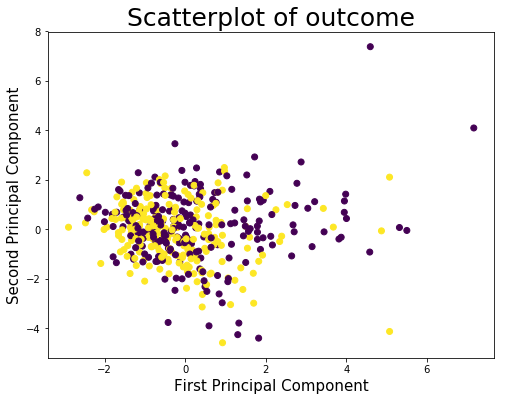

In [73]:
plt.rcParams['figure.figsize'] = (8,6)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.title('Scatterplot of outcome', fontsize=25)
plt.show()

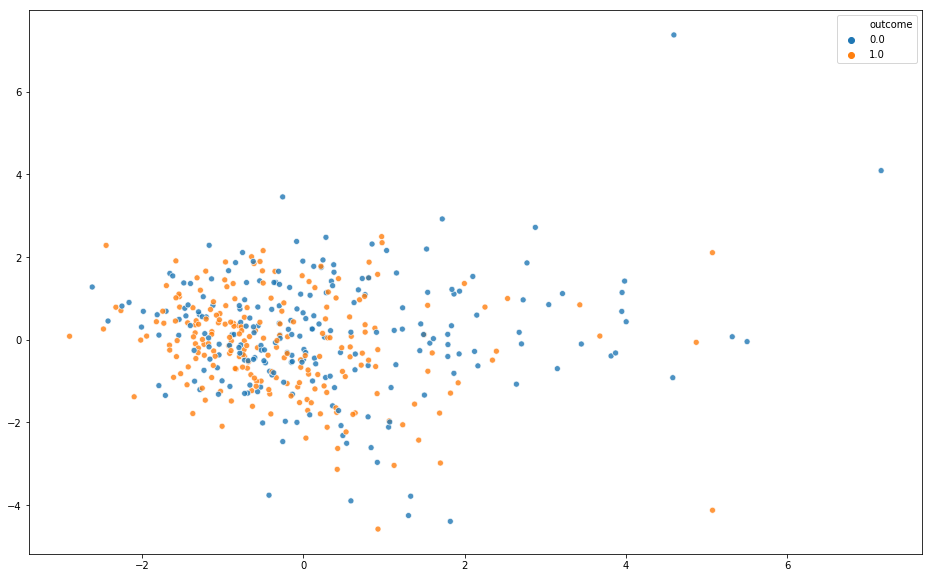

In [62]:
sns.scatterplot(x_pca[:, 0], x_pca[:, 1], hue=y, alpha=0.8)

In [68]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    z=x_pca[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=y,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [63]:
x.duration.sort_values().tail(10)

0       694.0
454     704.0
482     723.0
450     760.0
575     773.0
623     827.0
536     853.0
444     904.0
3      1276.0
485    1390.0
Name: duration, dtype: float64

In [64]:
x.duration.sort_values().head(10)

758    1.0
227    1.0
567    1.0
580    2.0
136    3.0
407    3.0
670    3.0
425    3.0
57     4.0
94     4.0
Name: duration, dtype: float64

In [ ]:
# %% Plo the PCA Spectrum

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# %%
n_components=[1,2,3,5,10]

Cs=10**np.linspace(-2,5,50)
my_param_dict = {'pca__n_components':n_components,
                    'logistic__C':Cs}
estimator = GridSearchCV(pipe,
                        my_param_dict)
                            # scoring='accuracy', cv=5,
                            #  return_train_score=True) #param_grid=grid_param,
estimator.fit(x,y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

estimator.best_score_

prediction=estimator.predict(x_test)
cnf_matrix = confusion_matrix(y_test, prediction)
cnf_matrix